# Analysis dataset 18 
Dataset 11 with manual keypoints

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Version 5 models

In [2]:
# Get list of all CSV files in the folder
csv_files = glob.glob('output/check quality/DHRdiff_18_0100_0.001_0_1_1_20241120-230705_BCS_1way_beam1_point_reverse_test/*.csv')

# Read each CSV file into a DataFrame and store in a list
df_5models = pd.read_csv(csv_files[0], header=0, index_col=0)

# Display the combined DataFrame
df_5models.head()

,mse_before,mse12,tre_before,tre12,mse12_image_before,mse12_image,ssim12_image_before,ssim12_image,num_points,votes
index,,,,,,,,,,
0,590.99133,126.508484,32.300415,14.119698,0.076292,0.018436,0.317088,0.435882,12.0,"[0, 0, 3, 3, 3, 0, 6, 6, 6, 6, 6, 0, 6, 6, 6, ..."
1,702.97820,162.002940,36.293774,15.705562,0.140819,0.079708,0.443707,0.494595,6.0,"[0, 6, 6, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]"
2,2938.06400,338.139950,76.484300,22.427935,0.086547,0.068943,0.310896,0.273889,11.0,"[5, 5, 5, 5, 5, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, ..."
3,1187.16560,161.852330,46.444990,16.668356,0.093404,0.056011,0.263288,0.234012,12.0,"[5, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 6, ..."
4,1318.01030,255.173320,50.401264,21.365023,0.081432,0.109806,0.388608,0.243417,12.0,"[5, 5, 5, 5, 5, 1, 5, 1, 5, 1, 5, 5, 5, 5, 5, ..."


# Version 10 models

In [3]:
# Get list of all CSV files in the folder
csv_files = glob.glob('output/added new models/DHRdiff_18_0100_0.001_0_1_1_20241122-004214_BCS_1way_beam1_point_reverse_test/*.csv')
# print(csv_files)

# Read each CSV file into a DataFrame and store in a list
df_10models = pd.read_csv(csv_files[0], header=0, index_col=0)

# Display the combined DataFrame
df_10models.head()

,mse_before,mse12,tre_before,tre12,mse12_image_before,mse12_image,ssim12_image_before,ssim12_image,num_points,votes
index,,,,,,,,,,
0,590.99133,21.775133,32.300415,5.735022,0.076292,0.083996,0.317088,0.355041,12.0,"[0, 17, 0, 17, 17, 17, 17, 17, 6, 17, 6, 6, 18..."
1,702.97820,85.416850,36.293774,9.866286,0.140819,0.097429,0.443707,0.449894,6.0,"[5, 5, 11, 1, 1, 1, 1, 1, 2, 2, 2, 8, 2, 2, 19..."
2,2938.06400,278.487430,76.484300,20.293770,0.086547,0.080070,0.310896,0.271542,11.0,"[10, 10, 10, 10, 10, 11, 11, 11, 3, 3, 3, 3, 3..."
3,1187.16560,41.995083,46.444990,6.839566,0.093404,0.044121,0.263288,0.164864,12.0,"[6, 6, 6, 6, 9, 9, 10, 9, 9, 9, 5, 13, 13, 17,..."
4,1318.01030,86.396450,50.401264,11.705308,0.081432,0.082289,0.388608,0.327317,12.0,"[15, 10, 10, 10, 10, 1, 10, 1, 10, 1, 10, 10, ..."


In [4]:
step_list = []

# take length of each data in the column votes
print("10/5 models : ")
for i in range(0, len(df_5models['votes'])-2):
    # convert into list first
    df_10models['votes'].iloc[i] = eval(df_10models['votes'].iloc[i])
    df_5models['votes'].iloc[i] = eval(df_5models['votes'].iloc[i])
    # print(f"{len(df_10models['votes'][i])-len(df_5models['votes'][i])}")
    step_list.append(len(df_10models['votes'].iloc[i])-len(df_5models['votes'].iloc[i]))

10/5 models : 


/tmp/ipykernel_2899/1627588176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10models['votes'].iloc[i] = eval(df_10models['votes'].iloc[i])
/tmp/ipykernel_2899/1627588176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5models['votes'].iloc[i] = eval(df_5models['votes'].iloc[i])
/tmp/ipykernel_2899/1627588176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10models['votes'].iloc[i] = eval(df_10models['votes'].ilo

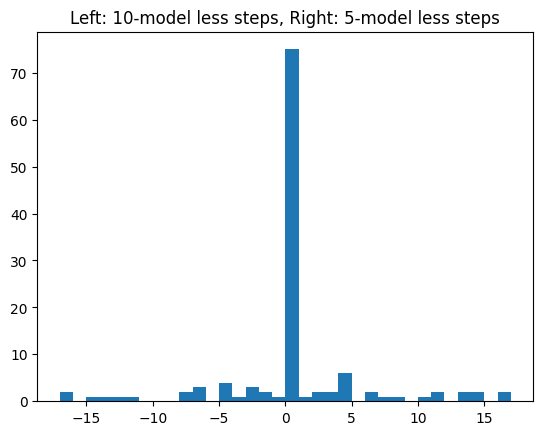

In [5]:
# make a histogram of the step_list

plt.hist(step_list, bins=np.arange(min(step_list), max(step_list)+1, 1))
plt.title("Left: 10-model less steps, Right: 5-model less steps")
plt.show()

In [6]:
# print amount of negative and positive values
print(f"10-model less steps: {len([i for i in step_list if i < 0])}")
print(f"5-model less steps: {len([i for i in step_list if i > 0])}")
print(f"Equal steps: {len([i for i in step_list if i == 0])}")


10-model less steps: 22
5-model less steps: 24
Equal steps: 75


In [7]:
# show the most common 3 steps in each model
for i in range(0, len(df_5models['votes'])-2):
    # print the most common 3 models used
    num = 3
    print(f"10-models: {sorted(set(df_10models['votes'].iloc[i]), key = df_10models['votes'].iloc[i].count, reverse=True)[:num]}")
    print(f"5-models:  {sorted(set(df_5models['votes'].iloc[i]), key = df_5models['votes'].iloc[i].count, reverse=True)[:num]}\n")
    

10-models: [1, 6, 17]
5-models:  [2, 6, 0]

10-models: [1, 2, 19]
5-models:  [2, 1, 6]

10-models: [3, 10, 11]
5-models:  [3, 5, 6]

10-models: [17, 9, 6]
5-models:  [7, 1, 6]

10-models: [10, 19, 1]
5-models:  [5, 1, 9]

10-models: [19, 16, 9]
5-models:  [0, 3, 6]

10-models: [17, 9, 6]
5-models:  [1, 6, 7]

10-models: [19, 1, 5]
5-models:  [5, 7, 0]

10-models: [3, 19, 11]
5-models:  [6, 3, 4]

10-models: [19, 13, 1]
5-models:  [8, 1, 6]

10-models: [19, 0, 1]
5-models:  [6, 0, 3]

10-models: [10, 13, 12]
5-models:  [8, 5, 7]

10-models: [1, 3, 0]
5-models:  [1, 3, 0]

10-models: [11, 15, 1]
5-models:  [6, 1, 3]

10-models: [3, 11, 16]
5-models:  [1, 0, 3]

10-models: [1, 11, 14]
5-models:  [1, 6, 2]

10-models: [18, 17, 14]
5-models:  [6]

10-models: [4, 0, 3]
5-models:  [4, 0, 3]

10-models: [0, 1, 11]
5-models:  [6, 0, 4]

10-models: [18, 1, 2]
5-models:  [2, 1, 5]

10-models: [19, 1, 13]
5-models:  [9, 8, 1]

10-models: [9, 2, 11]
5-models:  [2, 1, 5]

10-models: [13, 6, 2]
5-mod

In [8]:
# count the number of times the most common model is used
most_common_10 = [0]*20
most_common_5 = [0]*10

for i in range(0, len(df_5models['votes'])-2):
    # print the most common 3 models used
    most_common_10[sorted(set(df_10models['votes'].iloc[i]), key = df_10models['votes'].iloc[i].count, reverse=True)[0]] += 1
    most_common_5[sorted(set(df_5models['votes'].iloc[i]), key = df_5models['votes'].iloc[i].count, reverse=True)[0]] += 1

print("Number of times the most common model is used:")
print(f"10-models: {most_common_10}")
print(f"5-models:  {most_common_5}\n")

Number of times the most common model is used:
10-models: [1, 11, 7, 12, 7, 4, 1, 7, 5, 7, 7, 8, 7, 3, 2, 2, 1, 6, 6, 17]
5-models:  [3, 16, 22, 14, 8, 5, 17, 18, 5, 13]



# The most used 
## Version 5 models
1. Translation
2. Scaling
3. Rotation
4. Shearing
5. Mix 1-4

6. 6-10 Reverse of 1-5

## Version 10 models
1. Translation
2. Scaling
3. Rotation
4. Shearing
5. Mix
6. Translation (no stoppage)
7. Scaling (no stoppage)
8. Rotation (no stoppage)
9. Shearing (no stoppage)
10. Mix 6-9
11. 11-20 Reverse of 1-10

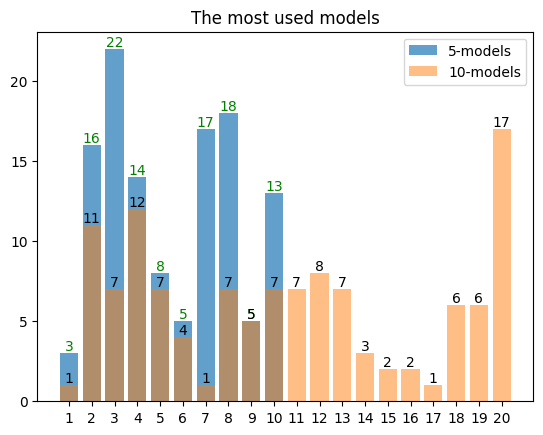

In [9]:
# make histogram of the most common models
plt.bar(range(10), most_common_5, alpha=0.7)
# show count on top of the bar
for i in range(10):
    plt.text(i, most_common_5[i], most_common_5[i], ha='center', va='bottom', color='green')

plt.bar(range(20), most_common_10, alpha=0.5)
plt.title("The most used models")

# show x label as 1-20
plt.xticks(range(20), range(1, 21))
# show count on top of the bar
for i in range(20):
    plt.text(i, most_common_10[i], most_common_10[i], ha='center', va='bottom')

# legend 
plt.legend(["5-models", "10-models"])
plt.show()


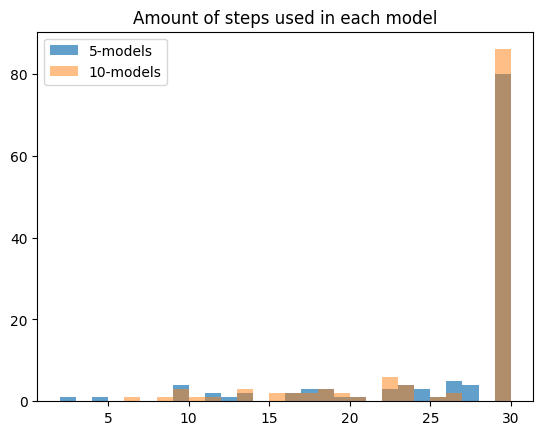

In [10]:
# amount of steps used in each model
step_list_10 = []
step_list_5 = []

for i in range(0, len(df_5models['votes'])-2):
    step_list_10.append(len(df_10models['votes'].iloc[i]))
    step_list_5.append(len(df_5models['votes'].iloc[i]))

# make a histogram of the step_list
plt.hist(step_list_5, bins=np.arange(min(step_list_5), max(step_list_5)+1, 1), alpha=0.7)
plt.hist(step_list_10, bins=np.arange(min(step_list_10), max(step_list_10)+1, 1), alpha=0.5)
plt.title("Amount of steps used in each model")
plt.legend(["5-models", "10-models"])